In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
!ls -lh v_atlas/

total 3073344
-rw-r--r--  1 yoavfreund  staff   1.5G Jul  4 16:02 compressed_atlas.npy
-rw-r--r--  1 yoavfreund  staff   3.9K Jul  4 16:20 meta_information.pkl


In [9]:
tbl=np.load('v_atlas/compressed_atlas.npy')

In [10]:
tbl.shape

(625, 571, 551)

In [11]:
from collections import Counter
c=Counter(tbl.flatten())

In [12]:
c

Counter({0: 184352361,
         1: 434562,
         2: 434562,
         3: 23207,
         4: 23207,
         5: 3790071,
         6: 52219,
         7: 52219,
         8: 184782,
         9: 194706,
         10: 1,
         11: 1,
         12: 13720,
         13: 13720,
         14: 285976,
         15: 67858,
         16: 57934,
         17: 2653574,
         18: 95954,
         19: 95954,
         20: 36428,
         21: 36428,
         22: 7006,
         23: 7006,
         24: 935,
         25: 935,
         26: 65737,
         27: 77693,
         28: 151768,
         29: 151768,
         30: 153587,
         31: 165543,
         32: 11956,
         33: 22794,
         34: 22794,
         35: 399211,
         36: 399211,
         37: 2468,
         38: 2468,
         39: 100732,
         40: 100732,
         41: 8820,
         42: 8820,
         43: 13439,
         44: 13439,
         45: 51770,
         46: 51770,
         47: 3341,
         48: 3341,
         49: 255477,
        

In [13]:
blob=1.*(tbl==5)

In [14]:
blob.shape

(625, 571, 551)

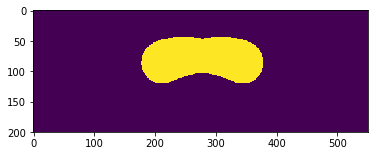

In [15]:
imshow(blob[:200,210,:])

In [ ]:
from skimage.measure import marching_cubes_lewiner,marching_cubes

In [27]:
X=marching_cubes_lewiner(blob)
X[0].shape,X[1].shape

((230444, 3), (460884, 3))

In [32]:
X=marching_cubes_lewiner(blob,step_size=10)
X[0].shape,X[1].shape

((2288, 3), (4572, 3))

In [26]:
X[0][:6,:]

array([[ 31.5, 143. , 248. ],
       [ 32. , 143. , 247.5],
       [ 32. , 142.5, 248. ],
       [ 32. , 142.5, 249. ],
       [ 31.5, 143. , 249. ],
       [ 32. , 142.5, 250. ]], dtype=float32)

In [25]:
X[1][:6,:]

array([[2, 1, 0],
       [4, 3, 0],
       [0, 3, 2],
       [6, 5, 4],
       [4, 5, 3],
       [8, 7, 6]], dtype=int32)

### Finding the boundary
Dead end

In [27]:
from scipy.signal import convolve

In [29]:
conv=convolve(blob,np.ones([2,2,2])/8,mode='same')

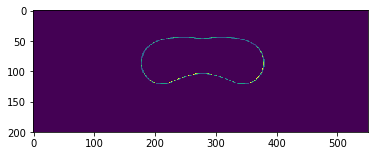

In [36]:
diff=blob-conv
imshow(abs(diff[:200,210,:]))

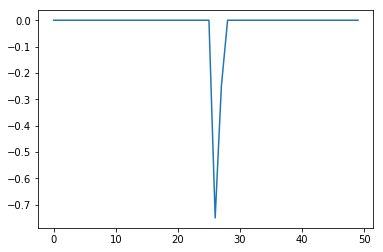

In [38]:
plot(diff[100,210,350:400])

In [34]:
diff[100,210,179:183]

array([-1.92438658e-15, -2.50000000e-01,  2.50000000e-01, -2.88657986e-15])

### making cycles from the connected edges.

If exists, we start from the previous cycle to create a triangle strip.

If there aren't any, or if some edge is not covered, we create a new cycle.

In [54]:
diff[diff<0.1]=0

In [55]:
X=np.nonzero(diff)
len(X)

3

In [56]:
XX=np.array(X)

In [57]:
XX.shape

(3, 114479)

In [58]:
XX[:,:4]

array([[ 32,  32,  32,  32],
       [143, 143, 143, 143],
       [248, 249, 250, 251]])

In [49]:
start=XX[:,0]
start

array([ 32, 143, 248])

In [53]:
def _diff(x):
    return diff[x[0],x[1],x[2]]
_diff(start)

0.8749999999999991

In [61]:
def vals_around(d,x,fix=2):
    """Scan a 3x3 range around x, fixing one coordinate"""
    if(fix==2):
        return d[x[0]-1:x[0]+3,x[1]-1:x[1]+3,x[2]]
vals_around(diff,start)
    

array([[0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.875, 0.625, 0.5  ],
       [0.5  , 0.375, 0.125, 0.   ],
       [0.   , 0.   , 0.   , 0.   ]])

In [1]:
dir=np.array()

ImportError: dlopen(/usr/local/lib/python2.7/site-packages/cv2.so, 2): Symbol not found: _PyCObject_Type
  Referenced from: /usr/local/lib/python2.7/site-packages/cv2.so
  Expected in: flat namespace
 in /usr/local/lib/python2.7/site-packages/cv2.so